# <Center> Enigma Machine Learning Code Fest - EDA</Center>

In [1]:
import os
os.chdir('E:/Anupam/HomeDocs/DataScience/UpX-Academy/Hackathon/Enigma/Dataset/')
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [3]:
train_dataset = pd.read_csv ('train.csv')
test_dataset = pd.read_csv ('test.csv')
train_dataset.head(5)

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942,2,155623,7855,42
1,327662,a,26046,12,21781,55801,1175
2,468453,c,1358,4,56177,8067,60
3,96996,a,264,3,168793,27064,9
4,131465,c,4271,4,112223,13986,83


## Exploratory Data Analysis

In [4]:
train_dataset.describe()

,ID,Reputation,Answers,Username,Views,Upvotes
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,247428.257525,7525.478261,4.153846,77085.709030,34112.645485,353.565217
std,133666.406350,22577.894943,4.115335,47355.200342,86852.004473,1526.383518
min,2161.000000,0.000000,0.000000,156.000000,28.000000,0.000000
25%,132352.000000,346.000000,2.000000,37460.500000,2612.500000,8.000000
50%,249937.000000,1189.000000,3.000000,75602.000000,9217.000000,32.000000
75%,366614.000000,4520.000000,5.000000,111449.500000,29739.500000,83.500000
max,471482.000000,249097.000000,41.000000,173127.000000,895555.000000,17598.000000


In [5]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 7 columns):
ID            299 non-null int64
Tag           299 non-null object
Reputation    299 non-null int64
Answers       299 non-null int64
Username      299 non-null int64
Views         299 non-null int64
Upvotes       299 non-null int64
dtypes: int64(6), object(1)
memory usage: 16.4+ KB


#### Inference:
1. There are no NaN values in the dataset
2. All column data types look to be OK
3. The standard deviation of Views and Upvotes looks to be quite high

#### Exploring No of questions of each category

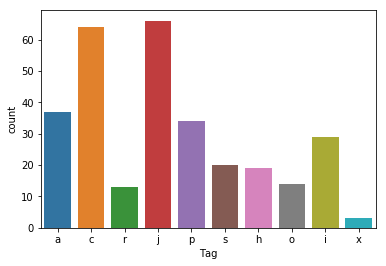

In [6]:
sns.countplot(x="Tag", data = train_dataset)

#### Summary of Upvotes and Answers per Tag category

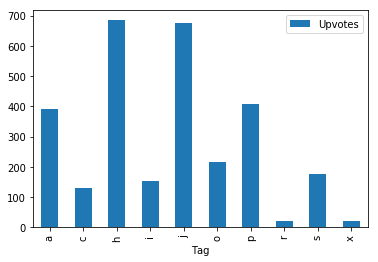

In [7]:
train_dataset[['Tag', 'Upvotes']].groupby('Tag').mean().plot.bar()

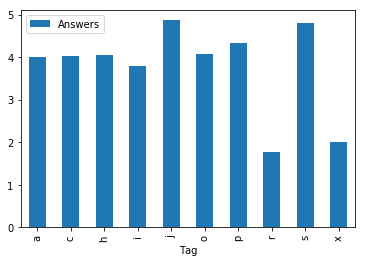

In [8]:
train_dataset[['Tag', 'Answers']].groupby('Tag').mean().plot.bar()

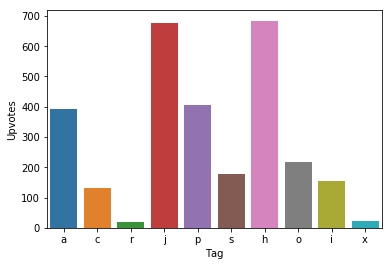

In [9]:
sns.barplot(x='Tag', y='Upvotes', data=train_dataset,ci=None)

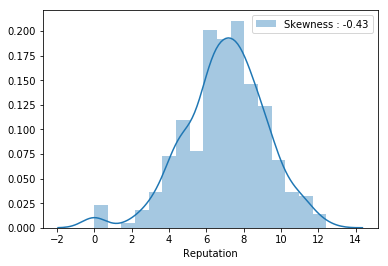

In [10]:
train_temp = train_dataset[['Reputation']]
train_temp['Reputation'] = train_temp['Reputation'].map(lambda i: np.log(i) if i>0 else 0)
g = sns.distplot(train_temp["Reputation"],label="Skewness : %.2f"%(train_temp["Reputation"].skew()))
g.legend(loc = 'best')

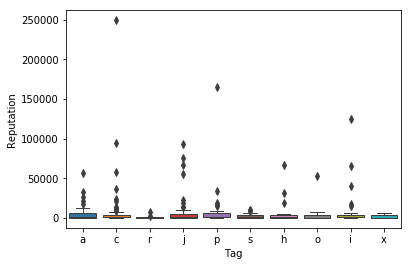

In [11]:
sns.boxplot(x='Tag', y='Reputation', data=train_dataset, linewidth=1)

### The category which got highest number of Upvotes & % of Upvotes per View

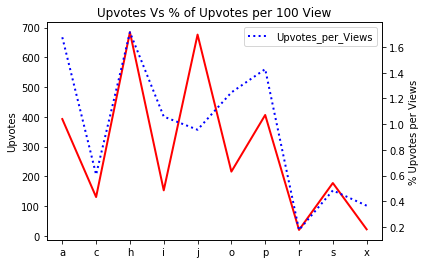

In [12]:
category_views = train_dataset.groupby('Tag').mean()
category_views['Upvotes_per_Views'] = category_views.Upvotes/category_views.Views * 100

fig, ax1 = plt.subplots()
ax1.plot(category_views.Upvotes, linewidth = 2, color = 'red')
ax1.set_ylabel("Upvotes")
ax2 = ax1.twinx()

ax2.plot(category_views.Upvotes_per_Views,  linestyle = 'dotted', linewidth = 2, color = 'blue')
ax2.set_ylabel("% Upvotes per Views")
plt.title('Upvotes Vs % of Upvotes per 100 View')
plt.legend()
plt.show()

#### Inference:
1. Category J received highest number of Upvotes
2. Categories C, J and P received highest percentage of upvotes. It implies, category C and P have received higher % Upvotes though their number of upvotes are lower than category J

# Analysis of top 10 Users having highest Upvotes per question

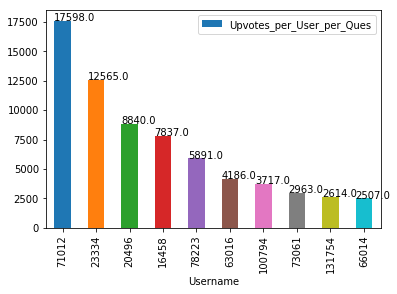

In [13]:
user_upvotes = train_dataset[['Username', 'Upvotes']].groupby(['Username']).sum().reset_index()
user_ques = train_dataset[['Username', 'ID']].groupby(['Username']).count().reset_index()
user_upvotes_ques = pd.merge(user_upvotes, user_ques, on = 'Username', how = 'right')
user_upvotes_ques['Upvotes_per_User_per_Ques'] = round(user_upvotes_ques.Upvotes/user_upvotes_ques.ID, 0)
user_upvotes_ques = user_upvotes_ques.sort_values(['Upvotes_per_User_per_Ques'], ascending = [False])
ax = user_upvotes_ques.head(10).plot.bar(x = 'Username', y = 'Upvotes_per_User_per_Ques', linewidth = 5)
#for getting the values on each bar
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x(), i.get_height()))

### Analysis of top 10 users having highest Upvotes and Reputation

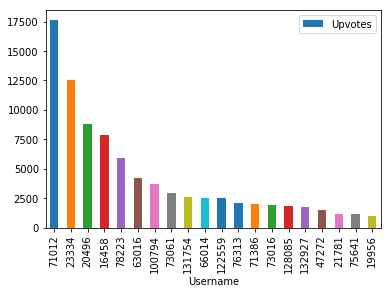

In [14]:
user_question = train_dataset[['Username', 'Upvotes', 'Reputation']].groupby(['Upvotes']).sum().reset_index().\
    sort_values('Upvotes', ascending = False).head(20)

ax = user_question.plot.bar(x = 'Username', y = 'Upvotes', linewidth = 5)


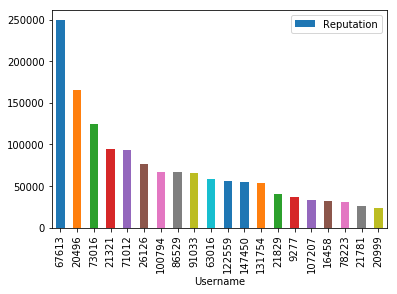

In [15]:
user_question = train_dataset[['Username', 'Reputation']].groupby(['Reputation']).sum().reset_index().\
    sort_values('Reputation', ascending = False).head(20)

ax = user_question.plot.bar(x = 'Username', y = 'Reputation', linewidth = 5)

### Analysis of No of Questions written by user

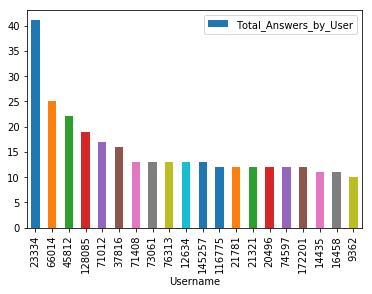

In [16]:
user_question = train_dataset[['Username', 'Answers']].groupby(['Username']).sum().reset_index().\
    sort_values('Answers', ascending = False).head(20)
user_question.rename(columns={'Answers':'Total_Answers_by_User'}, inplace=True)


train_dataset = pd.merge(train_dataset, user_question, on = 'Username', how = 'left').fillna(0)
ax = user_question.plot.bar(x = 'Username', y = 'Total_Answers_by_User', linewidth = 5)


# Repeat the same for test dataset
user_test_question = test_dataset[['Username', 'Answers']].groupby(['Username']).sum().reset_index().\
    sort_values('Answers', ascending = False).head(20)
user_test_question.rename(columns={'Answers':'Total_Answers_by_User'}, inplace=True)

test_dataset = pd.merge(test_dataset, user_test_question, on = 'Username', how = 'left').fillna(0)

### Feature Engineering

In [17]:
train_dataset.Tag = pd.factorize(train_dataset.Tag)[0]
test_dataset.Tag = pd.factorize(test_dataset.Tag)[0]

In [18]:
train_dataset['Views_per_Answer'] = round(train_dataset.Views/(train_dataset.Answers).mean(), 2)
test_dataset['Views_per_Answer'] = round(test_dataset.Views/(test_dataset.Answers).mean(), 2)

train_dataset['Views_per_Reputation'] = round(train_dataset.Views/(train_dataset.Reputation).mean(), 2)
test_dataset['Views_per_Reputation'] = round(test_dataset.Views/(test_dataset.Reputation).mean(), 2)


In [19]:
train_dataset['Views_Scale']= round(train_dataset['Views']/train_dataset['Views'].mean(), 2)
test_dataset['Views_Scale']= round(test_dataset['Views']/test_dataset['Views'].mean(), 2)

train_dataset['Reputation_Scale']= round(train_dataset['Reputation']/train_dataset['Reputation'].mean(), 2)
test_dataset['Reputation_Scale']= round(test_dataset['Reputation']/test_dataset['Reputation'].mean(), 2)

train_dataset['Answers_Scale']= round(train_dataset['Answers']/train_dataset['Answers'].mean(), 2)
test_dataset['Answers_Scale']= round(test_dataset['Answers']/test_dataset['Answers'].mean(), 2)
train_dataset.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,Total_Answers_by_User,Views_per_Answer,Views_per_Reputation,Views_Scale,Reputation_Scale,Answers_Scale
0,52664,0,3942,2,155623,7855,42,0.0,1891.02,1.04,0.23,0.52,0.48
1,327662,0,26046,12,21781,55801,1175,12.0,13433.57,7.41,1.64,3.46,2.89
2,468453,1,1358,4,56177,8067,60,0.0,1942.06,1.07,0.24,0.18,0.96
3,96996,0,264,3,168793,27064,9,0.0,6515.41,3.60,0.79,0.04,0.72
4,131465,1,4271,4,112223,13986,83,0.0,3367.00,1.86,0.41,0.57,0.96


### Lets review the correlation matrix and Pair Plot to understand dependency of input variables

In [20]:
train_dataset.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,Total_Answers_by_User,Views_per_Answer,Views_per_Reputation,Views_Scale,Reputation_Scale,Answers_Scale
ID,1.0,-0.01,-0.029,-0.065,0.1,0.02,-0.052,-0.031,0.02,0.02,0.019,-0.029,-0.065
Tag,-0.01,1.0,-0.0018,-0.0013,0.0091,-0.015,-0.0005,0.034,-0.015,-0.015,-0.015,-0.0019,-0.0015
Reputation,-0.029,-0.0018,1.0,0.16,-0.08,0.046,0.43,0.17,0.046,0.046,0.046,1.0,0.16
Answers,-0.065,-0.0013,0.16,1.0,-0.04,0.61,0.55,0.85,0.61,0.61,0.61,0.16,1.0
Username,0.1,0.0091,-0.08,-0.04,1.0,-0.035,-0.076,-0.091,-0.035,-0.034,-0.034,-0.08,-0.04
Views,0.02,-0.015,0.046,0.61,-0.035,1.0,0.49,0.57,1.0,1.0,1.0,0.046,0.61
Upvotes,-0.052,-0.0005,0.43,0.55,-0.076,0.49,1.0,0.58,0.49,0.49,0.49,0.43,0.54
Total_Answers_by_User,-0.031,0.034,0.17,0.85,-0.091,0.57,0.58,1.0,0.57,0.57,0.57,0.17,0.85
Views_per_Answer,0.02,-0.015,0.046,0.61,-0.035,1.0,0.49,0.57,1.0,1.0,1.0,0.046,0.61
Views_per_Reputation,0.02,-0.015,0.046,0.61,-0.034,1.0,0.49,0.57,1.0,1.0,1.0,0.046,0.61


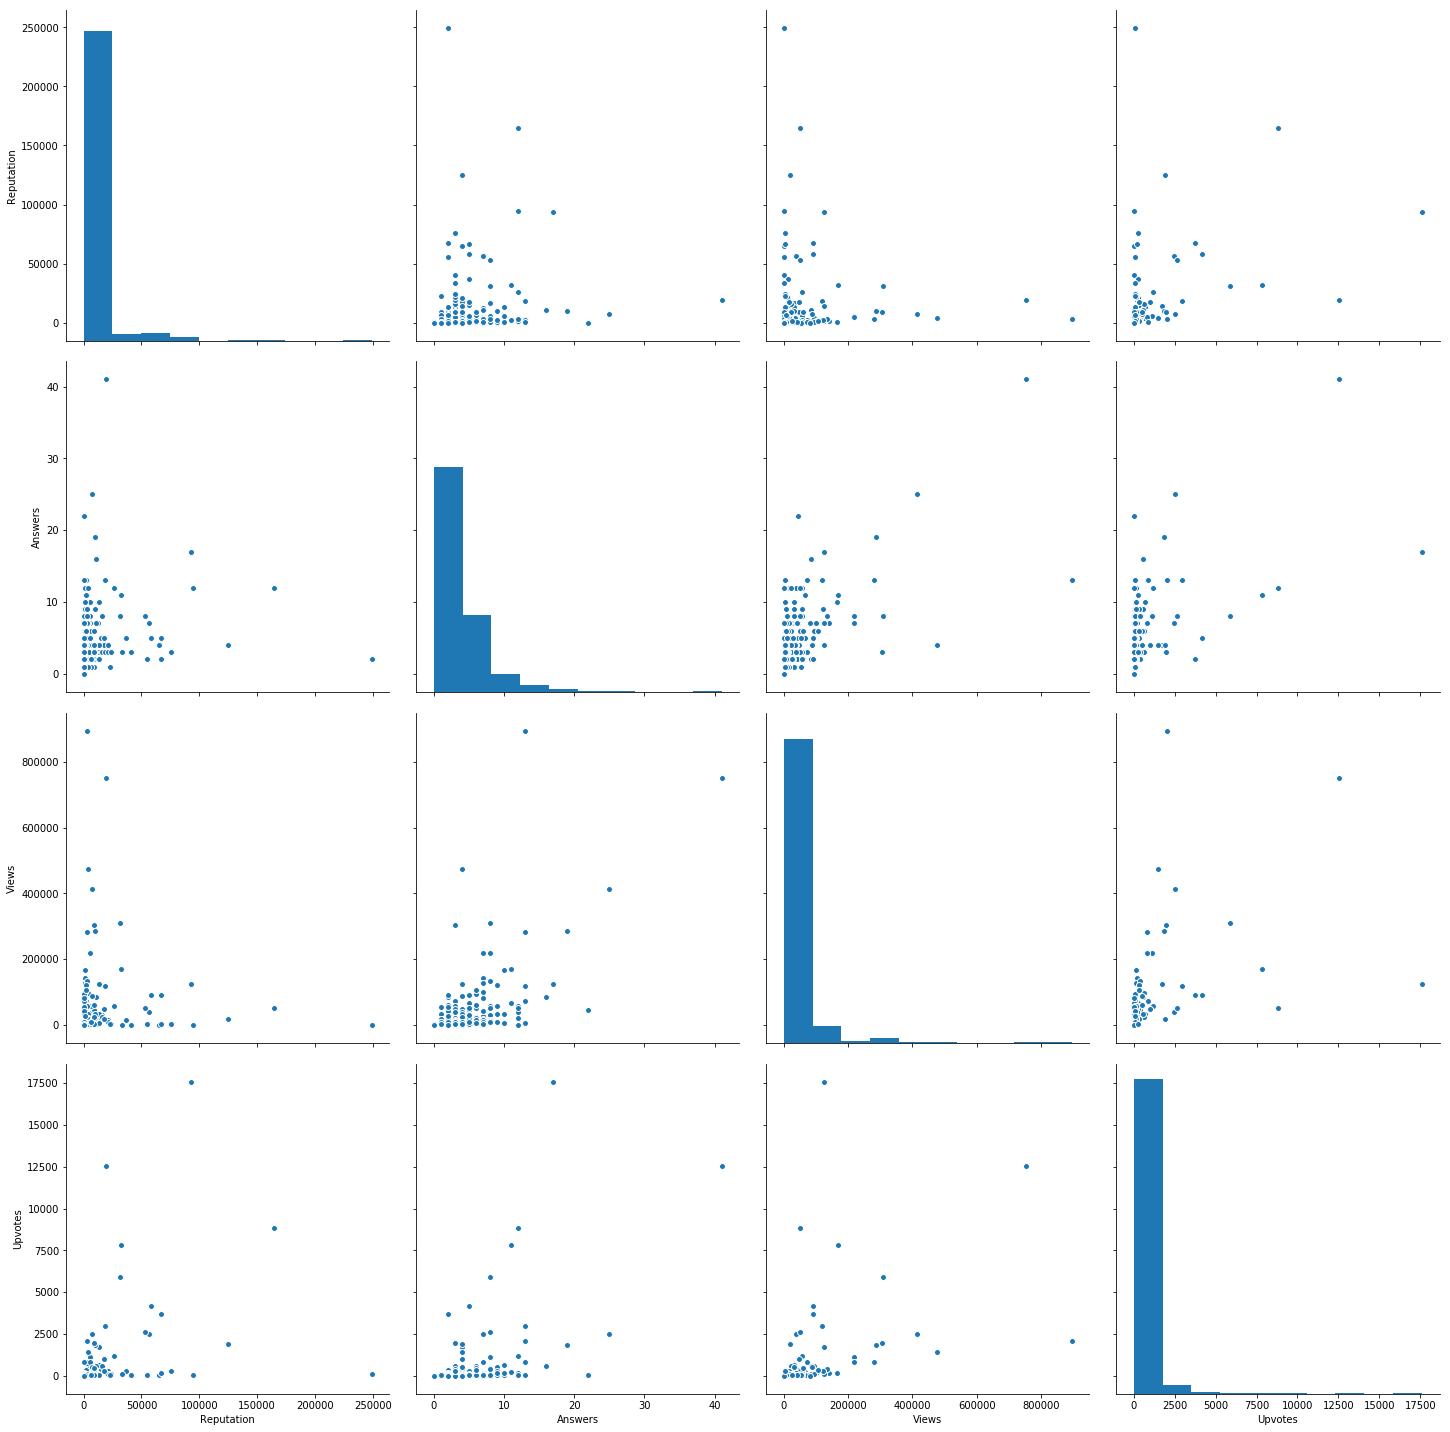

In [21]:
sns.pairplot(train_dataset, palette="husl", vars=["Reputation", "Answers", 'Views',  'Upvotes'], size =5)
plt.show()


#### Inference:
1. None of the input variables seem to be +vely correlated

In [22]:
# Output the Dataframe into a CSV file
train_dataset.to_csv('train_EDA.csv',  index = False)
test_dataset.to_csv('test_EDA.csv',  index = False)